# Artificial Neural Network (ANN)
# Perception > yapay nöron

AKTİVASYON FONKSİYONLARI

# SIGMOID FUNCTION
0-1 ARASINDA DEGER ALIR
SINIFLANDIRMA PROBLEMLERİNDE KULLANIRIZ.
# Tanh FUNCTION (hiperbolik tanjant)
-1-+1 arasında değer alır.
Negatif değerlere daha geniş bir kapsam sağlar.
genelde sınıflandırma operasyonlarında kullanılır.
# ReLU (Rectified Linear Unit) 
0-sonsuz arasında deger alır
Derin öğrenme alanında sıklıkla karşımıza çıkar
# Linear Function
f(x) = x
sonsuz deger alabilir



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
fiyat = np.random.randint(690,895,300)
yıl = np.random.randint(2015,2020,300)
km = np.random.randint(11000,78000,300)
liste = list(zip(yıl,km,fiyat))

In [3]:
fytlist = pd.DataFrame(liste,columns =["ÜRETİM YILI", "KM BİLGİSİ (km)","FİYATI (TL)"])
fytlist


,ÜRETİM YILI,KM BİLGİSİ (km),FİYATI (TL)
0,2018,23479,721
1,2018,26932,741
2,2015,77032,829
3,2015,15292,714
4,2015,17278,889
...,...,...,...
295,2015,23711,882
296,2015,65068,810
297,2018,25448,804
298,2019,30226,789


In [8]:
bisiklet = pd.read_excel("bisiklet_fiyatlari.xlsx")

In [9]:
bisiklet.head(15)

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430
5,950.221425,1749.463071,1751.099011
6,972.099912,1750.482746,1750.778662
7,730.747018,1750.724858,1748.037351
8,653.006430,1750.029061,1747.332994
9,1108.363012,1749.834880,1752.790342


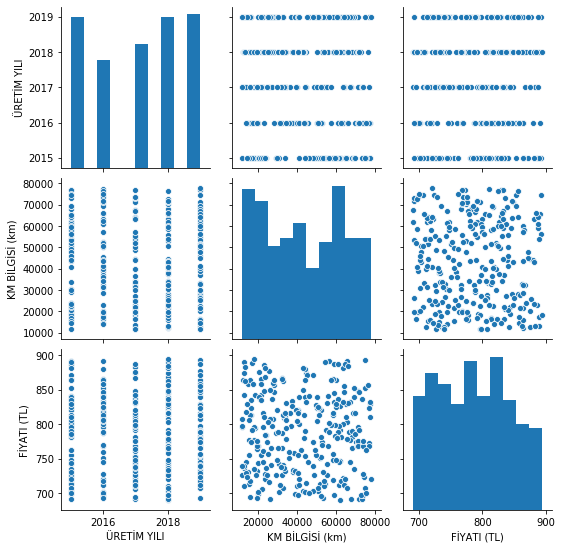

In [10]:
sbn.pairplot(fytlist)

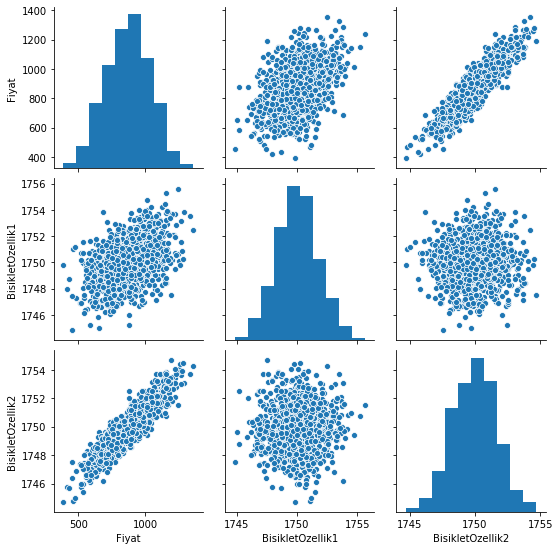

In [11]:
sbn.pairplot(bisiklet)

# VERİYİ 2 YE BÖLME (test/train)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
#train_test_split
bisiklet.head(10)

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430
5,950.221425,1749.463071,1751.099011
6,972.099912,1750.482746,1750.778662
7,730.747018,1750.724858,1748.037351
8,653.006430,1750.029061,1747.332994
9,1108.363012,1749.834880,1752.790342


In [16]:
# y wx + b
# y-> label
y = bisiklet["Fiyat"].values

# x -> feature (özellik)
x = bisiklet[["BisikletOzellik1","BisikletOzellik2"]]

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.33,random_state = 15)

In [18]:
x_test.shape

(330, 2)

In [19]:
x_train.shape

(670, 2)

In [20]:
y_train.shape

(670,)

In [21]:
 #scaling = boyutunu büyütmek veya küçültmek

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scalar = MinMaxScaler()

In [24]:
scalar.fit(x_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [26]:
x_train = scalar.transform(x_train)
x_test = scalar.transform(x_test)

In [29]:
import tensorflow as tf

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [31]:
model = Sequential()

model.add(Dense(4, activation = "relu")) #örnek 3 tane hidden layer olacaksa 3 defa ekleriz
model.add(Dense(4, activation = "relu"))
model.add(Dense(4, activation = "relu"))

model.add(Dense(1)) # çıktı nöronu
model.compile(optimizer = "rmsprop", loss = "mse") #modelimiz eğitilmeye hazır.

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [32]:
model.fit(x_train,y_train,epochs = 250) #modeli eğitiyoruz

Epoch 1/250
670/670 [==============================] - 1s 838us/sample - loss: 800560.7841
Epoch 2/250
670/670 [==============================] - 0s 27us/sample - loss: 799017.9479
Epoch 3/250
670/670 [==============================] - 0s 28us/sample - loss: 797991.8937
Epoch 4/250
670/670 [==============================] - 0s 28us/sample - loss: 797222.5791
Epoch 5/250
670/670 [==============================] - 0s 28us/sample - loss: 796654.5612
Epoch 6/250
670/670 [==============================] - 0s 28us/sample - loss: 796246.2144
Epoch 7/250
670/670 [==============================] - 0s 25us/sample - loss: 795960.4670
Epoch 8/250
670/670 [==============================] - 0s 25us/sample - loss: 795766.9159
Epoch 9/250
670/670 [==============================] - 0s 25us/sample - loss: 795638.5500
Epoch 10/250
670/670 [==============================] - 0s 25us/sample - loss: 795534.4547
Epoch 11/250
670/670 [==============================] - 0s 25us/sample - loss: 795320.4183
Epoch 1

670/670 [==============================] - 0s 25us/sample - loss: 26858.9145
Epoch 92/250
670/670 [==============================] - 0s 24us/sample - loss: 26860.9179
Epoch 93/250
670/670 [==============================] - 0s 25us/sample - loss: 26900.9638
Epoch 94/250
670/670 [==============================] - 0s 25us/sample - loss: 26866.1790
Epoch 95/250
670/670 [==============================] - 0s 25us/sample - loss: 26903.4772
Epoch 96/250
670/670 [==============================] - 0s 24us/sample - loss: 26866.9123
Epoch 97/250
670/670 [==============================] - 0s 24us/sample - loss: 26887.2536
Epoch 98/250
670/670 [==============================] - 0s 24us/sample - loss: 26840.6744
Epoch 99/250
670/670 [==============================] - 0s 24us/sample - loss: 26868.5428
Epoch 100/250
670/670 [==============================] - 0s 25us/sample - loss: 26888.8659
Epoch 101/250
670/670 [==============================] - 0s 24us/sample - loss: 26861.1922
Epoch 102/250
670/670

670/670 [==============================] - 0s 22us/sample - loss: 26910.6174
Epoch 182/250
670/670 [==============================] - 0s 22us/sample - loss: 26867.7378
Epoch 183/250
670/670 [==============================] - 0s 24us/sample - loss: 26885.5807
Epoch 184/250
670/670 [==============================] - 0s 24us/sample - loss: 26886.0226
Epoch 185/250
670/670 [==============================] - 0s 24us/sample - loss: 26887.1486
Epoch 186/250
670/670 [==============================] - 0s 24us/sample - loss: 26890.6684
Epoch 187/250
670/670 [==============================] - 0s 25us/sample - loss: 26921.1389
Epoch 188/250
670/670 [==============================] - 0s 24us/sample - loss: 26895.4551
Epoch 189/250
670/670 [==============================] - 0s 24us/sample - loss: 26842.1969
Epoch 190/250
670/670 [==============================] - 0s 25us/sample - loss: 26836.6570
Epoch 191/250
670/670 [==============================] - 0s 23us/sample - loss: 26895.7512
Epoch 192/250

In [33]:
loss = model.history.history["loss"]

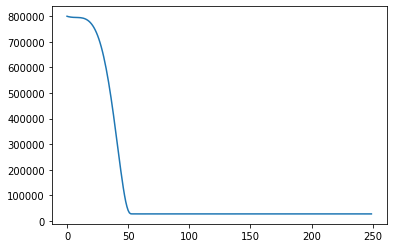

In [34]:
sbn.lineplot(x=range(len(loss)),y=loss)

In [42]:
egitim = model.evaluate(x_train,y_train, verbose =0 )
egitim

26844.327273787312

In [44]:
test = model.evaluate(x_test,y_test,verbose = 0)
test

27398.885239109848

DİKKAT EDERSENİZ SONUÇLARA MODELİN SONUCU 781259, TESTİN SONUCU İSE 758893 YANİ BİRİBİRE YAKIN SAYILICAK DEGERLER

In [45]:
trainloss = pd.Series(egitim)
testloss = pd.Series(test)

In [53]:
tahmin = model.predict(x_test)
gercek = y_test

In [57]:
gercekdf = pd.DataFrame(gercek,columns=["GERÇEK"])
tahmindf = pd.DataFrame(tahmin,columns =["TAHMİNİ"])



In [58]:
birlesmis = pd.concat([gercekdf,tahmindf],axis =1)

In [59]:
birlesmis

,GERÇEK,TAHMİNİ
0,1081.652164,882.683044
1,622.675990,882.794861
2,889.356810,882.724121
3,902.826733,882.790527
4,897.662404,882.800903
...,...,...
325,1028.438035,882.686951
326,789.934950,882.803284
327,758.490486,882.744934
328,1172.871659,882.640259


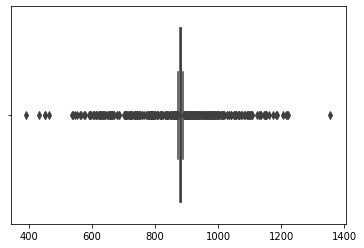

In [60]:
sbn.boxplot(birlesmis)

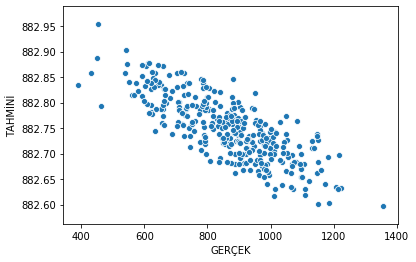

In [61]:
sbn.scatterplot(data = birlesmis,x="GERÇEK",y = "TAHMİNİ")

In [62]:
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [63]:
mean_squared_error(birlesmis["GERÇEK"],birlesmis["TAHMİNİ"])

27398.885193594007

In [64]:
mean_absolute_error(birlesmis["GERÇEK"],birlesmis["TAHMİNİ"])

131.5586345419318

In [65]:
bisiklet.describe().T

,count,mean,std,min,25%,50%,75%,max
Fiyat,1000.0,872.677801,164.124504,390.856887,757.795031,879.168705,988.612778,1355.213745
BisikletOzellik1,1000.0,1750.024800,1.704531,1744.852108,1748.831119,1750.017350,1751.115766,1755.613884
BisikletOzellik2,1000.0,1749.964733,1.659578,1744.742389,1748.803186,1750.003926,1751.129414,1754.666038
